<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/SMA_trading_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this involves the use of a dual moving crossover avg to detect when to buy or sell stocks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
# Use the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
end_date = datetime.today().strftime('%Y-%m-%d')
AAPL=yf.download('AAPL',start='2013-01-01',end=end_date)
AAPL

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705698,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494839,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035378,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941056,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983954,458707200
...,...,...,...,...,...,...
2024-08-08,213.110001,214.199997,208.830002,213.309998,213.063385,47161100
2024-08-09,212.100006,216.779999,211.970001,216.240005,215.990005,42201600
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100


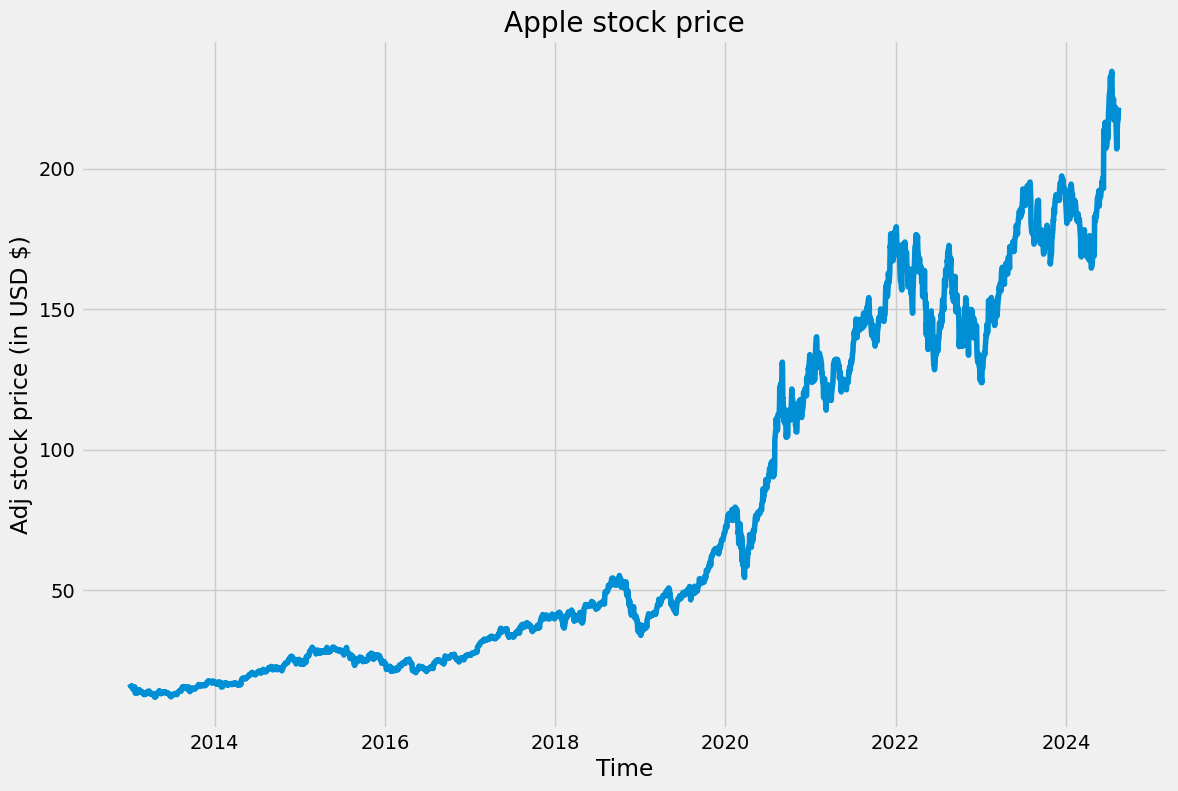

In [ ]:
plt.figure(figsize=(12.5,8.5))
plt.title('Apple stock price')
plt.plot(AAPL['Adj Close'],label='Apple')
plt.xlabel('Time')
plt.ylabel('Adj stock price (in USD $)')
plt.show()


In [ ]:
SMA30=pd.DataFrame()
SMA30['Adj Close']=AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
Date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN
...,...
2024-08-08,221.201961
2024-08-09,221.273212
2024-08-12,221.511663


In [ ]:
SMA100=pd.DataFrame()
SMA100['Adj Close']=AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
Date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN
...,...
2024-08-08,194.936497
2024-08-09,195.363556
2024-08-12,195.782474


In [ ]:
data=pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA100']=SMA100['Adj Close']

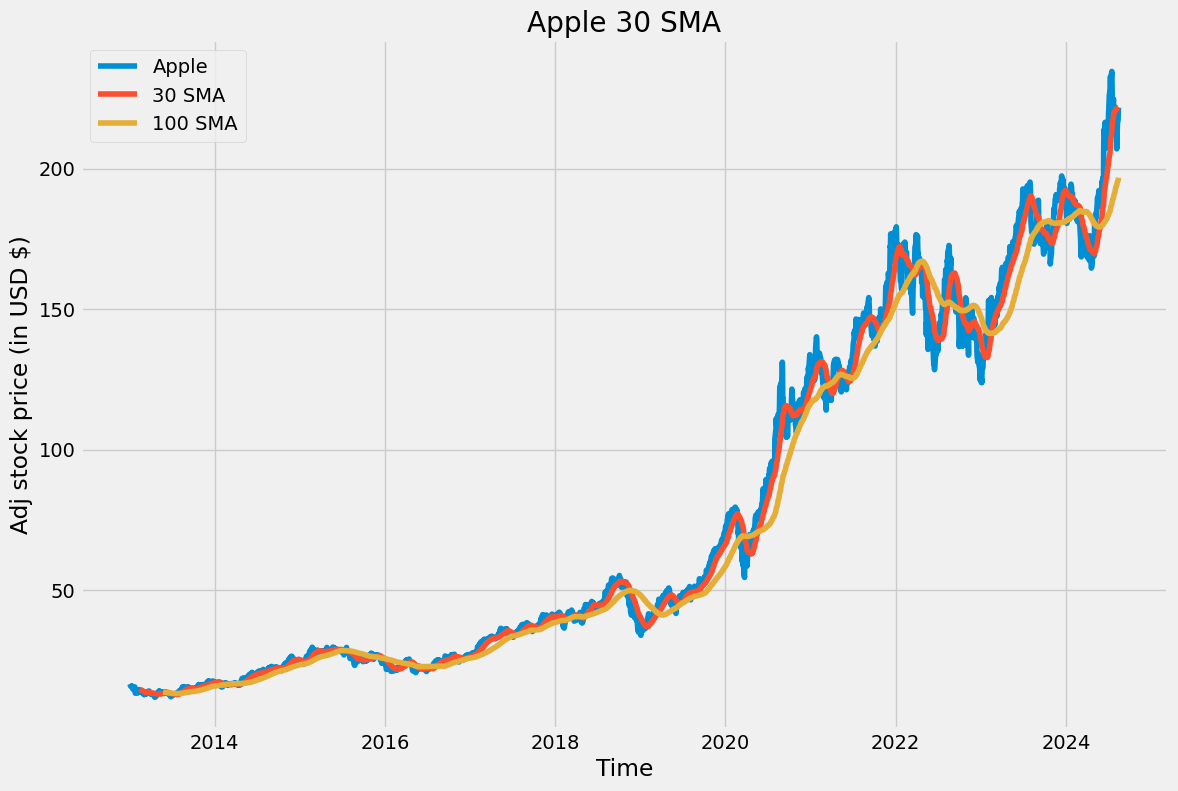

In [ ]:
plt.figure(figsize=(12.5,8.5))
plt.title('Apple 30 SMA')
plt.plot(AAPL['Adj Close'],label='Apple')
plt.plot(SMA30['Adj Close'],label='30 SMA')
plt.plot(SMA100['Adj Close'],label='100 SMA')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Adj stock price (in USD $)')
plt.show()

In [ ]:
def buy_sell(data):
    sigPricebuy = []
    sigPricesell = []
    position = 0

    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if position != 1:
                sigPricebuy.append(data['AAPL'][i])
                sigPricesell.append(np.nan)
                position = 1
            elif position ==1:
                sigPricebuy.append(np.nan)
                sigPricesell.append(np.nan)

        elif data['SMA30'][i] < data['SMA100'][i]:
            if position != 0:
                sigPricebuy.append(np.nan)
                sigPricesell.append(data['AAPL'][i])
                position = 0
            elif position==0:
                sigPricebuy.append(np.nan)
                sigPricesell.append(np.nan)

        else:
            sigPricebuy.append(np.nan)
            sigPricesell.append(np.nan)

    return (sigPricebuy, sigPricesell)

In [ ]:
# Now call the function again
signals = buy_sell(data)
data['Buy_Signal_Price'] = signals[0]
data['Sell_Signal_Price'] = signals[1]

print(signals[0])
signals[1]

buy_count = data['Buy_Signal_Price'].count()
sell_count = data['Sell_Signal_Price'].count()
print("Number of buy signals:", buy_count)
print("Number of sell signals:", sell_count)

higher_count = (data['SMA30'] > data['SMA100']).astype(int).sum()
lower_count = (data['SMA30'] < data['SMA100']).astype(int).sum()
print(higher_count)
print(lower_count)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 13.61109447479248, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 14.296381950378418, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

<ipython-input-120-69501d594455>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA30'][i] > data['SMA100'][i]:
<ipython-input-120-69501d594455>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA30'][i] < data['SMA100'][i]:
<ipython-input-120-69501d594455>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigPricebuy.append(data['AAPL'][i])
<ipython-input-120-69501d594455>:19: FutureWarning: Series.__getitem_

In [ ]:
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2013-01-02,16.705698,NaN,NaN,NaN,NaN
2013-01-03,16.494839,NaN,NaN,NaN,NaN
2013-01-04,16.035378,NaN,NaN,NaN,NaN
2013-01-07,15.941056,NaN,NaN,NaN,NaN
2013-01-08,15.983954,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-08-08,213.063385,221.201961,194.936497,NaN,NaN
2024-08-09,215.990005,221.273212,195.363556,NaN,NaN
2024-08-12,217.529999,221.511663,195.782474,NaN,NaN


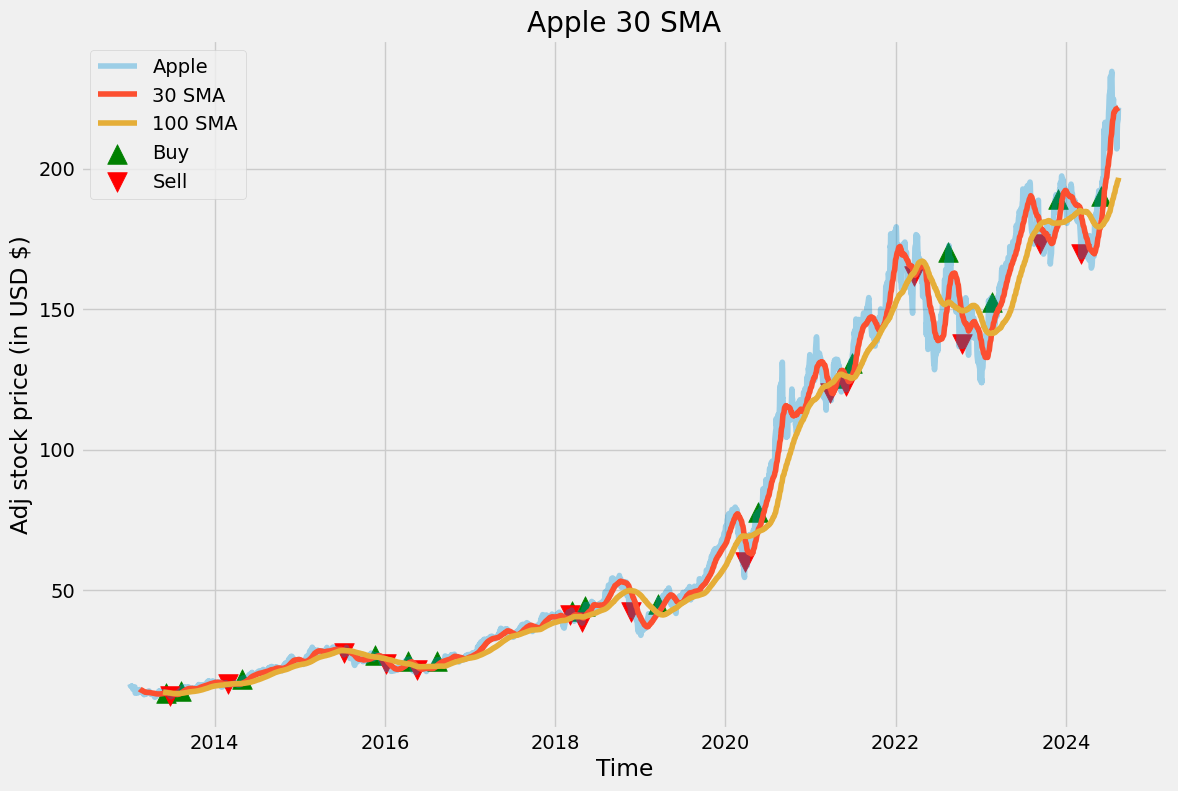

In [ ]:
plt.figure(figsize=(12.5,8.5))
plt.title('Apple 30 SMA')
plt.plot(AAPL['Adj Close'],label='Apple',alpha=0.35)
plt.plot(SMA30['Adj Close'],label='30 SMA')
plt.plot(SMA100['Adj Close'],label='100 SMA')
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green',s=200)
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red',s=200)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Adj stock price (in USD $)')
plt.show()